In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [11]:
# 데이터 불러오기
marketing = pd.read_csv('marketing_advanced.csv', encoding='cp949')

In [12]:
def check_df(dataframe, head=5):
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 1000)
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.info())
    print("##################### Describe #####################")
    print(dataframe.describe(include='all'))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Head #####################")
    print(dataframe.head(head))

In [13]:
def uni_df(dataframe):
    for col in dataframe:
        print(col,dataframe[col].unique())

In [14]:
check_df(marketing)

##################### Shape #####################
(104899, 25)
##################### Types #####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104899 entries, 0 to 104898
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       104899 non-null  object 
 1   customer_id                    104899 non-null  object 
 2   order_status                   104899 non-null  object 
 3   order_purchase_timestamp       104899 non-null  object 
 4   order_approved_at              104899 non-null  object 
 5   order_delivered_timestamp      102623 non-null  object 
 6   order_estimated_delivery_date  104899 non-null  object 
 7   age                            104899 non-null  int64  
 8   gender                         104899 non-null  object 
 9   country                        104899 non-null  object 
 10  payment_type                   104899 n

In [15]:
# 날짜형으로 변환할 컬럼 목록
date_cols = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_timestamp',
    'order_estimated_delivery_date'
]
for col in date_cols:
    marketing[col] = pd.to_datetime(marketing[col], errors='coerce')

In [16]:
check_df(marketing)

##################### Shape #####################
(104899, 25)
##################### Types #####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104899 entries, 0 to 104898
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       104899 non-null  object        
 1   customer_id                    104899 non-null  object        
 2   order_status                   104899 non-null  object        
 3   order_purchase_timestamp       104899 non-null  datetime64[ns]
 4   order_approved_at              104899 non-null  datetime64[ns]
 5   order_delivered_timestamp      102623 non-null  datetime64[ns]
 6   order_estimated_delivery_date  104899 non-null  datetime64[ns]
 7   age                            104899 non-null  int64         
 8   gender                         104899 non-null  object        
 9   country                

In [17]:
uni_df(marketing)

order_id ['e22acc9c116caa3f2b7121bbb380d08e' '3594e05a005ac4d06a72673270ef9ec9'
 'b33ec3b699337181488304f362a6b734' ... 'fdc45e6c7555e6cb3cc0daca2557dbe1'
 '94d3ee0bc2a0af9d4fa47a4d63616e8d' 'f79a35da168301ae56922475da21117b']
customer_id ['0000366f3b9a7992bf8c76cfdf3221e2' '0000b849f77a49e4a4ce2b2a4ca5be3f'
 '0000f46a3911fa3c0805444483337064' ... 'ffff371b4d645b6ecea244b27531430a'
 'ffff5962728ec6157033ef9805bacc48' 'ffffd2657e2aad2907e67c3e9daecbeb']
order_status ['delivered' 'shipped' 'canceled' 'invoiced' 'processing' 'unavailable'
 'approved']
order_purchase_timestamp <DatetimeArray>
['2024-10-10 16:29:00', '2024-10-07 17:47:00', '2023-08-10 16:35:00', '2024-03-12 15:03:00', '2024-04-14 13:49:00', '2024-09-05 19:12:00', '2024-09-20 17:23:00', '2024-07-28 12:48:00', '2024-07-28 16:30:00', '2023-08-04 16:18:00',
 ...
 '2024-01-11 18:24:00', '2024-12-20 11:59:00', '2024-12-02 20:41:00', '2024-02-01 05:48:00', '2024-05-27 20:22:00', '2025-01-15 21:29:00', '2024-05-17 21:39:00', '2023-

In [18]:
# 오타 수정
marketing['category2'] = marketing['category2'].replace('낚세', '낚시')
uni_df(marketing)

order_id ['e22acc9c116caa3f2b7121bbb380d08e' '3594e05a005ac4d06a72673270ef9ec9'
 'b33ec3b699337181488304f362a6b734' ... 'fdc45e6c7555e6cb3cc0daca2557dbe1'
 '94d3ee0bc2a0af9d4fa47a4d63616e8d' 'f79a35da168301ae56922475da21117b']
customer_id ['0000366f3b9a7992bf8c76cfdf3221e2' '0000b849f77a49e4a4ce2b2a4ca5be3f'
 '0000f46a3911fa3c0805444483337064' ... 'ffff371b4d645b6ecea244b27531430a'
 'ffff5962728ec6157033ef9805bacc48' 'ffffd2657e2aad2907e67c3e9daecbeb']
order_status ['delivered' 'shipped' 'canceled' 'invoiced' 'processing' 'unavailable'
 'approved']
order_purchase_timestamp <DatetimeArray>
['2024-10-10 16:29:00', '2024-10-07 17:47:00', '2023-08-10 16:35:00', '2024-03-12 15:03:00', '2024-04-14 13:49:00', '2024-09-05 19:12:00', '2024-09-20 17:23:00', '2024-07-28 12:48:00', '2024-07-28 16:30:00', '2023-08-04 16:18:00',
 ...
 '2024-01-11 18:24:00', '2024-12-20 11:59:00', '2024-12-02 20:41:00', '2024-02-01 05:48:00', '2024-05-27 20:22:00', '2025-01-15 21:29:00', '2024-05-17 21:39:00', '2023-

In [19]:
# order_status별 결측치 확인
print(marketing['order_status'].value_counts())

order_status
delivered      102624
shipped          1143
canceled          481
invoiced          331
processing        311
unavailable         7
approved            2
Name: count, dtype: int64


In [20]:
# order_delivered_timestamp이 결측인 경우의 order_status 확인
print(marketing[marketing['order_delivered_timestamp'].isnull()]['order_status'].value_counts())

# 배송이 되지 않은 고객들의 order_delivered_timestamp가 결측치 인것 을 확인 할수 있다. 그럼으로 타당한 결측치임으로 유지한다.
# canceled인데 order_delivered_timestamp있는 값과 delivered인데 order_delivered_timestamp 없는 값 확인 필요

order_status
shipped        1143
canceled        474
invoiced        331
processing      311
delivered         8
unavailable       7
approved          2
Name: count, dtype: int64


In [21]:
# 실제 배송 완료된 고객만 approval_delay_minutes(결제승인까지 걸린 시간 (분 단위)) 결측값을 중앙값으로 대체
median_approval_delay = marketing[marketing['order_status'] == 'delivered']['approval_delay_minutes'].median()
marketing['approval_delay_minutes'].fillna(median_approval_delay, inplace=True)
# approval_delay_minutes 결측값이 사라짐
check_df(marketing)

##################### Shape #####################
(104899, 25)
##################### Types #####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104899 entries, 0 to 104898
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       104899 non-null  object        
 1   customer_id                    104899 non-null  object        
 2   order_status                   104899 non-null  object        
 3   order_purchase_timestamp       104899 non-null  datetime64[ns]
 4   order_approved_at              104899 non-null  datetime64[ns]
 5   order_delivered_timestamp      102623 non-null  datetime64[ns]
 6   order_estimated_delivery_date  104899 non-null  datetime64[ns]
 7   age                            104899 non-null  int64         
 8   gender                         104899 non-null  object        
 9   country                

/var/folders/dh/v6wj1h7d7bg8nxdblyppcb5w0000gn/T/ipykernel_26606/348787432.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  marketing['approval_delay_minutes'].fillna(median_approval_delay, inplace=True)


                                order_id                       customer_id order_status       order_purchase_timestamp              order_approved_at      order_delivered_timestamp  order_estimated_delivery_date           age  gender country payment_type  payment_installments                         seller_id  shipping_charges category1 category2          price  delivery_delay_days  approval_delay_minutes      weight_kg     volume_cm3   review_score marketing_info_agree agegroup        product_id
count                             104899                            104899       104899                         104899                         104899                         102623                         104899  104899.00000  104899  104899       104899         104899.000000                            104899     104899.000000    104899    104899  104899.000000        102623.000000           104899.000000  104899.000000  104899.000000  104899.000000               104899   104899            104

In [22]:
# delivered인데 order_delivered_timestamp 없는 값 확인 필요
marketing_delivered = marketing[marketing['order_status'] == 'delivered'].copy()
# 배송 완료된 고객중 order_delivered_timestamp(배송 완료시간) 결측값 확인
check_df(marketing_delivered)

##################### Shape #####################
(102624, 25)
##################### Types #####################
<class 'pandas.core.frame.DataFrame'>
Index: 102624 entries, 0 to 104898
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       102624 non-null  object        
 1   customer_id                    102624 non-null  object        
 2   order_status                   102624 non-null  object        
 3   order_purchase_timestamp       102624 non-null  datetime64[ns]
 4   order_approved_at              102624 non-null  datetime64[ns]
 5   order_delivered_timestamp      102616 non-null  datetime64[ns]
 6   order_estimated_delivery_date  102624 non-null  datetime64[ns]
 7   age                            102624 non-null  int64         
 8   gender                         102624 non-null  object        
 9   country                     

In [23]:
marketing_delivered = marketing_delivered[marketing_delivered['order_delivered_timestamp'].notnull()].copy()
# delivery_delay_days가 Null인 항목은 order_delivered_timestamp을 알수 없음으로 결측치 제거
check_df(marketing_delivered)

##################### Shape #####################
(102616, 25)
##################### Types #####################
<class 'pandas.core.frame.DataFrame'>
Index: 102616 entries, 0 to 104898
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       102616 non-null  object        
 1   customer_id                    102616 non-null  object        
 2   order_status                   102616 non-null  object        
 3   order_purchase_timestamp       102616 non-null  datetime64[ns]
 4   order_approved_at              102616 non-null  datetime64[ns]
 5   order_delivered_timestamp      102616 non-null  datetime64[ns]
 6   order_estimated_delivery_date  102616 non-null  datetime64[ns]
 7   age                            102616 non-null  int64         
 8   gender                         102616 non-null  object        
 9   country                     

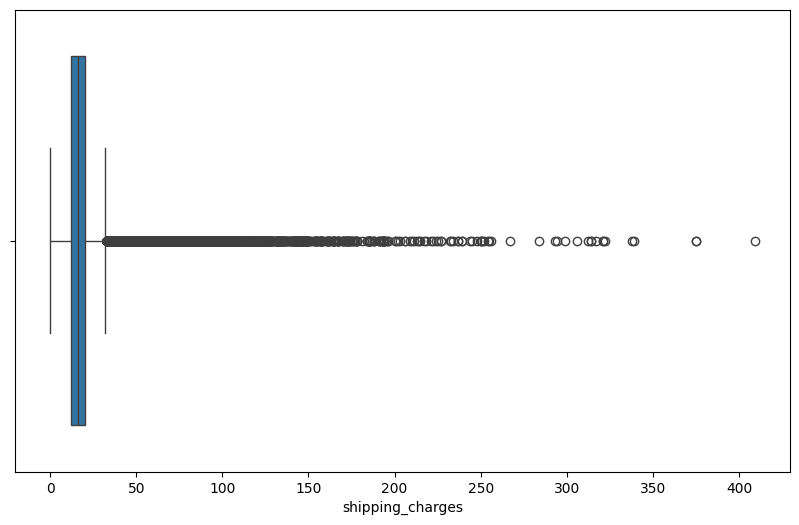

In [ ]:
# 배송비 IQR로 이상치 확인해보기 -선미
Q1 = marketing_delivered['shipping_charges'].quantile(0.25)
Q3 = marketing_delivered['shipping_charges'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

plt.figure(figsize=(10,6))
sns.boxplot(x=marketing_delivered['shipping_charges'])
plt.show()

In [ ]:
# 배보다 배꼽이 큰 경우 한번 확인해봄 가격<배송비 -선미 
expensive_shipping = marketing_delivered[marketing_delivered['shipping_charges'] > marketing_delivered['price']]
expensive_shipping

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,age,gender,country,payment_type,payment_installments,seller_id,shipping_charges,category1,category2,price,delivery_delay_days,approval_delay_minutes,weight_kg,volume_cm3,review_score,marketing_info_agree,agegroup,product_id
82,1405c563a488ba7869c598deec085886,00324c9f4d710e7bac5c5ba679714430,delivered,2023-11-21 00:22:00,2023-11-21 02:50:00,2023-12-04 15:47:00,2023-12-21,37,남성,중국,credit_card,7,8b28d096634035667e8263d57ba3368c,79,식품,건강식품,59.76,-17.0,15.0,0,12905.51,4,y,30대,d2e1b02d25294e6f
83,1405c563a488ba7869c598deec085886,00324c9f4d710e7bac5c5ba679714430,delivered,2023-11-21 15:01:00,2023-11-21 17:49:00,2023-12-04 15:47:00,2023-12-21,37,남성,중국,voucher,7,8b28d096634035667e8263d57ba3368c,79,식품,건강식품,57.01,-17.0,15.0,0,13902.15,4,y,30대,d2e1b02d25294e6f
150,990791b9237f52581d0a924b447c6fdf,0056c2dd794a5eede6164dcae635875a,delivered,2025-01-08 15:43:00,2025-01-08 17:14:00,2025-01-17 11:18:00,2025-01-27,55,여성,핀란드,credit_card,6,65febd49fd28ec955651299159b1f527,41,의류,여성의류,30.68,-10.0,1433.0,1,58043.36,3,n,50대,9fb67edd2e814911
165,5a7e3486fb94e316c6926e1d6d52749b,005f6fa02633470267dcd1e3ecd0fa79,delivered,2024-12-27 07:10:00,2024-12-27 08:14:00,2025-01-01 14:04:00,2025-01-22,45,남성,캐나다,credit_card,4,710e3548e02bc1d2831dfc4f1b5b14d4,72,의류,스포츠의류,39.99,-21.0,12.0,1,42778.04,5,n,40대,41aa76dd08e54f4e
319,eb3fabeabbe68b3abea891b6751aa77f,00c05fe9d2f8b245f1f86fe559175f24,delivered,2024-11-14 12:42:00,2024-11-14 12:54:00,2024-11-27 01:09:00,2024-12-05,40,여성,필리핀,wallet,1,a2b5b6105ea5942300631d2e76f4ffe0,50,의류,남성의류,46.24,-8.0,650.0,1,38873.99,5,y,40대,d23ef7767cf349e2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104815,a4d50b937362e8e372a220a53489d59f,ffc46f230cc7ce6109908f432eb9eb5b,delivered,2024-10-01 22:20:00,2024-10-02 00:53:00,2024-10-11 02:05:00,2024-10-29,26,여성,한국,credit_card,5,f181738b150df1f37cb0bd72e705b193,60,의류,파티의류,34.53,-18.0,26.0,1,45632.84,5,y,20대,64629adebdc649d6
104873,b40d597f0eb58c117cb5d9e424f10426,ffeddf8aa7cdecf403e77b2e9a99e2ea,delivered,2024-10-13 13:08:00,2024-10-13 15:00:00,2024-11-19 20:16:00,2024-11-13,55,여성,프랑스,voucher,5,de23c3b98a88888289c6f5cc1209054a,39,의류,파티의류,36.09,6.0,11.0,1,52734.25,3,y,50대,64629adebdc649d6
104884,cf4659487be50c0c317cff3564c4a840,fff5eb4918b2bf4b2da476788d42051c,delivered,2024-12-02 20:41:00,2024-12-02 21:19:00,2024-12-16 11:12:00,2025-01-01,34,여성,말레이시아,wallet,1,56e361f411e38dcef17cdc2a3d99628b,299,전자제품,청소기,105.54,-16.0,4285.0,5,211424.62,2,y,30대,04ea1d5b16654cee
104893,725cf8e9c24e679a8a5a32cb92c9ce1e,fffcf5a5ff07b0908bd4e2dbc735a684,delivered,2023-11-08 15:00:00,2023-11-08 17:23:00,2023-12-06 09:22:00,2024-01-02,40,여성,브라질,credit_card,10,17f51e7198701186712e53a39c564617,239,전자제품,비데,100.78,-27.0,15.0,0,243736.59,2,y,40대,4d1488c50d3f4b25


In [27]:
print(expensive_shipping.count())

order_id                         3263
customer_id                      3263
order_status                     3263
order_purchase_timestamp         3263
order_approved_at                3263
order_delivered_timestamp        3263
order_estimated_delivery_date    3263
age                              3263
gender                           3263
country                          3263
payment_type                     3263
payment_installments             3263
seller_id                        3263
shipping_charges                 3263
category1                        3263
category2                        3263
price                            3263
delivery_delay_days              3263
approval_delay_minutes           3263
weight_kg                        3263
volume_cm3                       3263
review_score                     3263
marketing_info_agree             3263
agegroup                         3263
product_id                       3263
dtype: int64


In [ ]:
#배보다 배꼽이 큰 3000개 데이터 나라별로 얼마나 있는지?? 나라로 구릅바이해서 보기 -선미
country_counts = expensive_shipping.groupby('country').size()
print(country_counts)
# 모든 나라가 다양하게 분포되어있는데....

country
괌         96
그리스      108
뉴질랜드     102
덴마크       95
독일        85
말레이시아     74
베트남       76
벨기에       75
브라질      116
스웨덴       96
스위스       98
스페인       98
싱가포르      73
영국        82
오스트리아     97
이탈리아     101
일본        67
중국       529
캐나다      104
태국        77
파키스탄      84
폴란드       99
프랑스      104
핀란드      103
필리핀       83
한국       368
호주       107
홍콩        66
dtype: int64


<Axes: xlabel='weight_kg', ylabel='shipping_charges'>

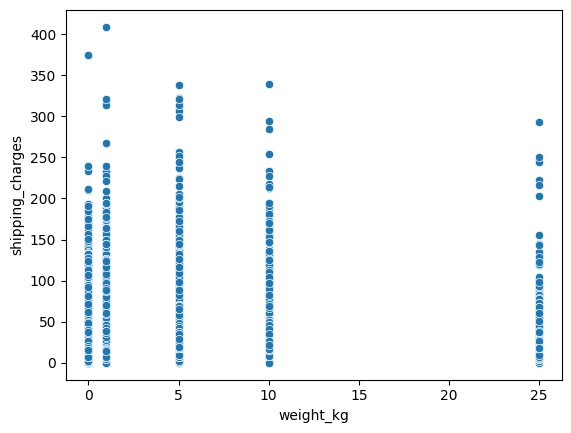

In [35]:
#   무게랑 배송비 비교 배송비가 넘 많은 경우 무게가 많이 들어서 비싼가?? 그럼 합리적인가? 보려고 - 선미
sns.scatterplot(data=marketing_delivered, x='weight_kg', y='shipping_charges')